In [61]:
#import libraries

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
titanic_data=pd.read_csv('train.csv')

In [64]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


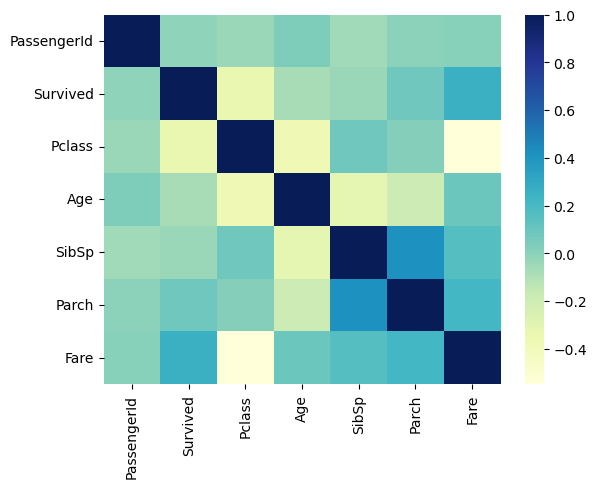

In [66]:
numeric_column = titanic_data.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_column.corr(), cmap="YlGnBu", )
plt.show()

In [67]:
from sklearn.model_selection import StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits=1,test_size=0.2)
for train_indices,test_indices in split.split(titanic_data,titanic_data[["Survived","Pclass","Sex"]]):
    strat_train_set=titanic_data.loc[train_indices]
    strat_test_set=titanic_data.loc[test_indices]

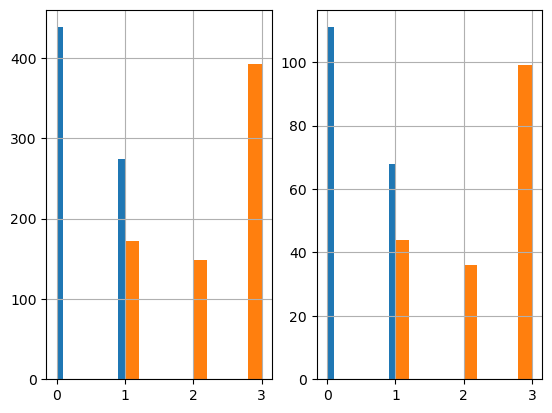

In [68]:
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1,2,2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()

plt.show()

In [69]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 365 to 819
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          575 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        167 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [70]:
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        imputer=SimpleImputer(strategy="mean")
        X['Age']=imputer.fit_transform(X[['Age']])
        return X

In [71]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        encoder=OneHotEncoder()
        matrix=encoder.fit_transform(X[['Embarked']]).toarray()

        column_names=["C","S","Q","N"]

        for i in range(len(matrix.T)):
            X[column_names[i]]=matrix.T[i]
            
        matrix = encoder.fit_transform(X[['Sex']]).toarray()
        column_names=["Female","Male"]
        for i in range(len(matrix.T)):
            X[column_names[i]]=matrix.T[i]

        return X

In [72]:
class FeatureDropper(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X.drop(['Embarked','Name','Ticket','Cabin','Sex','N'],axis=1,errors='ignore')

In [73]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("ageimputer", AgeImputer()),
    ("featureencoder", FeatureEncoder()),
    ("featuredropper", FeatureDropper()),
])

In [74]:
strat_train_set = pipeline.fit_transform(strat_train_set)

In [75]:
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
365,366,0,3,30.00000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
799,800,0,3,30.00000,1,1,24.1500,0.0,0.0,1.0,1.0,0.0
592,593,0,3,47.00000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
738,739,0,3,29.54247,0,0,7.8958,0.0,0.0,1.0,0.0,1.0
59,60,0,3,11.00000,5,2,46.9000,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
766,767,0,1,29.54247,0,0,39.6000,1.0,0.0,0.0,0.0,1.0
69,70,0,3,26.00000,2,0,8.6625,0.0,0.0,1.0,0.0,1.0
100,101,0,3,28.00000,0,0,7.8958,0.0,0.0,1.0,1.0,0.0
431,432,1,3,29.54247,1,0,16.1000,0.0,0.0,1.0,1.0,0.0


In [76]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 365 to 819
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [77]:
from sklearn.preprocessing import StandardScaler
X= strat_train_set.drop(['Survived'],axis=1)
Y = strat_train_set['Survived']    
scaler=StandardScaler()
X_data= scaler.fit_transform(X)
Y_data= Y.to_numpy()

In [78]:
X_data

array([[-2.89930193e-01,  8.27893418e-01,  3.46127149e-02, ...,
         6.20656111e-01, -7.35612358e-01,  7.35612358e-01],
       [ 1.37316149e+00,  8.27893418e-01,  3.46127149e-02, ...,
         6.20656111e-01,  1.35941164e+00, -1.35941164e+00],
       [ 5.79935735e-01,  8.27893418e-01,  1.32068269e+00, ...,
         6.20656111e-01, -7.35612358e-01,  7.35612358e-01],
       ...,
       [-1.30541244e+00,  8.27893418e-01, -1.16689635e-01, ...,
         6.20656111e-01,  1.35941164e+00, -1.35941164e+00],
       [-3.70176326e-02,  8.27893418e-01, -2.68766964e-16, ...,
         6.20656111e-01,  1.35941164e+00, -1.35941164e+00],
       [ 1.44980166e+00,  8.27893418e-01, -1.47841078e+00, ...,
         6.20656111e-01, -7.35612358e-01,  7.35612358e-01]])

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf=RandomForestClassifier()

param_grid=[
    {"n_estimators":[10,100,200,500],"max_depth":[None,5,10],"min_samples_split":[2,3,4]}
]

grid_search=GridSearchCV(clf,param_grid,cv=3,scoring="accuracy",return_train_score=True)
grid_search.fit(X_data,Y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [85]:
final_clf = grid_search.best_estimator_

In [95]:
final_clf.score(X_data,Y_data)

0.9873595505617978

In [89]:
strat_test_set = pipeline.fit_transform(strat_test_set)

In [90]:
strat_test_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
853,854,1,1,16.000000,0,1,39.4000,0.0,0.0,1.0,1.0,0.0
468,469,0,3,30.347122,0,0,7.7250,0.0,1.0,0.0,0.0,1.0
535,536,1,2,7.000000,0,2,26.2500,0.0,0.0,1.0,1.0,0.0
161,162,1,2,40.000000,0,0,15.7500,0.0,0.0,1.0,1.0,0.0
709,710,1,3,30.347122,1,1,15.2458,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
690,691,1,1,31.000000,1,0,57.0000,0.0,0.0,1.0,0.0,1.0
610,611,0,3,39.000000,1,5,31.2750,0.0,0.0,1.0,1.0,0.0
519,520,0,3,32.000000,0,0,7.8958,0.0,0.0,1.0,0.0,1.0
320,321,0,3,22.000000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0


In [91]:
X_test=strat_test_set.drop(['Survived'],axis=1)
Y_test = strat_test_set['Survived'] 
scaler=StandardScaler()
X_data_test= scaler.fit_transform(X_test)
Y_data_test= Y_test.to_numpy()

In [93]:
final_clf.score(X_data_test,Y_data_test)

0.7988826815642458

In [97]:
final_data=pipeline.fit_transform(titanic_data)

In [98]:
X_final=final_data.drop(['Survived'],axis=1)
Y_final = final_data['Survived'] 
scaler=StandardScaler()
X_data_final= scaler.fit_transform(X_final)
Y_data_final= Y_final.to_numpy()

In [99]:
prod_clf=RandomForestClassifier()

param_grid=[
    {"n_estimators":[10,100,200,500],"max_depth":[None,5,10],"min_samples_split":[2,3,4]}
]

grid_search=GridSearchCV(prod_clf,param_grid,cv=3,scoring="accuracy",return_train_score=True)
grid_search.fit(X_data_final,Y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [101]:
prod_final_clf = grid_search.best_estimator_

In [102]:
prod_final_clf

RandomForestClassifier(max_depth=5, min_samples_split=3, n_estimators=200)

In [103]:
titanic_test_data=pd.read_csv("test.csv")

In [104]:
titanic_test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [106]:
final_test_data=pipeline.fit_transform(titanic_test_data)

In [107]:
final_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   C            418 non-null    float64
 7   S            418 non-null    float64
 8   Q            418 non-null    float64
 9   Female       418 non-null    float64
 10  Male         418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.1 KB


In [110]:
X_final_test=final_test_data
X_final_test=X_final_test.fillna(method="ffill")
scaler=StandardScaler()
X_data_final_test=scaler.fit_transform(X_final_test)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_7748\3954139582.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_final_test=X_final_test.fillna(method="ffill")


In [111]:
predictions = prod_final_clf.predict(X_data_final_test)

In [112]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [113]:
final_df=pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived']=predictions
final_df.to_csv("predictions.csv",index=False)

In [114]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
